In [142]:
import numpy as np
import matplotlib.pyplot as plt
import random

def convert_to_gray(image):
    if len(image.shape) == 2:
        return image
    gray_image = np.mean(image, axis=2).astype(np.uint8)
    return gray_image

In [143]:
rgb_image = plt.imread('ck.tif')
gray_image = convert_to_gray(rgb_image)

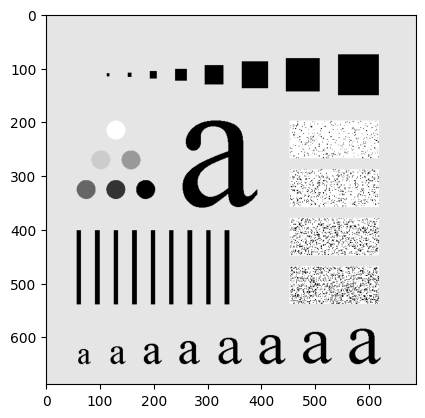

In [144]:
plt.imshow(gray_image, cmap='gray')

In [145]:
def add_salt_pepper_noise(image, percentage):
    noise = percentage/100
    width, height = image.shape
    noisy_image = image.copy()
    total_pixel = width * height
    noise_pixel = int(total_pixel*noise)
    for i in range(noise_pixel):
        random_row = random.randint(0+7, width-7)
        random_col = random.randint(0+7, height-7)
        noisy_image[random_row][random_col] = random.choice([0,255])
    return noisy_image

In [146]:
def cal_psnr(image1, image2):
    image1 = np.float64(image1)
    image2 = np.float64(image2)
    mse = np.mean((image1-image2) ** 2)
    
    if mse == 0:
        return float('inf')
    
    psnr = 20*np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)


In [147]:
noise_percentage = 10
noisy_image = add_salt_pepper_noise(gray_image, noise_percentage)
psnr = cal_psnr(gray_image, noisy_image)

Text(0.5, 1.0, 'Noisy image psnr 13.94')

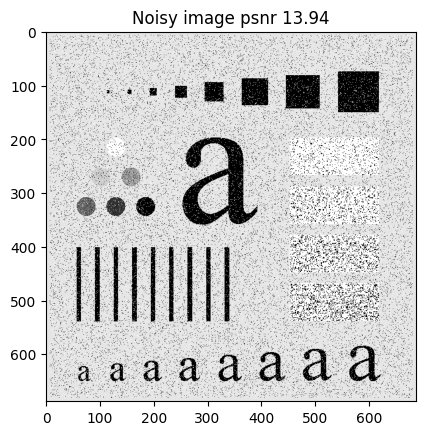

In [148]:
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy image psnr {psnr}')

In [149]:
def average_filter(image, kernelsize):
    filtered_image = np.zeros_like(image)
    row, col = image.shape
    padsize = kernelsize // 2
    starting_row = 0 + (kernelsize//2)
    starting_col = 0 + (kernelsize//2)
    ending_row = row - (kernelsize//2)
    ending_col = col - (kernelsize//2)
    mask = np.ones((kernelsize, kernelsize)) / (kernelsize ** 2)
    for i in range(starting_row, ending_row):
        for j in range(starting_col, ending_col):
            window = image[i-padsize:i+padsize+1, j-padsize:j+padsize+1]
            tempwindows = window.copy()
            tempwindows = tempwindows * mask
            tempwindowsmean = np.sum(tempwindows)
            filtered_image[i][j] = tempwindowsmean
    return np.uint8(filtered_image)

In [150]:
def median_filter(image, kernelsize):
    filtered_image = np.zeros_like(image)
    row, col = image.shape
    padsize = kernelsize // 2
    starting_row = 0+padsize
    starting_col = 0+padsize
    ending_row = row-padsize
    ending_col = col-padsize
    for i in range(starting_row, ending_row):
        for j in range(starting_col, ending_col):
            window = image[i-padsize:i+padsize+1, j-padsize:j+padsize+1]
            tempwindows = window.copy()
            tempwindows = np.median(tempwindows)
            filtered_image[i][j] = tempwindows
    return np.uint8(filtered_image)

In [151]:
kernel_size = 3
average_filtered_image = average_filter(noisy_image, kernel_size)
average_filtered_image_psnr = cal_psnr(gray_image, average_filtered_image)
print(average_filtered_image_psnr)

16.86


In [152]:
median_filtered_image = median_filter(noisy_image, kernel_size)
median_filtered_image_psnr = cal_psnr(gray_image, median_filtered_image)
print(median_filtered_image_psnr)

17.94


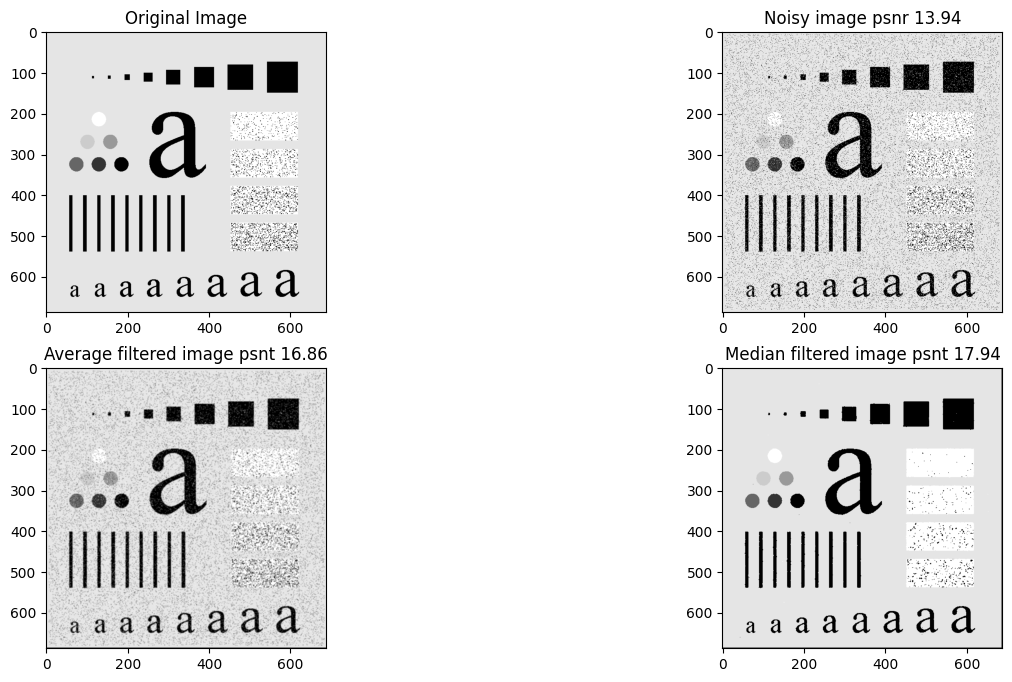

In [154]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy image psnr {psnr}')
plt.subplot(2,2,3)
plt.imshow(average_filtered_image, cmap='gray')
plt.title(f'Average filtered image psnt {average_filtered_image_psnr}')
plt.subplot(2,2,4)
plt.imshow(median_filtered_image, cmap='gray')
plt.title(f'Median filtered image psnt {median_filtered_image_psnr}')
plt.tight_layout
plt.show()
